In [98]:
#Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонк
#из самих файлов (product_id, quantity)
#имя пользователя (name), и дату этих покупок (date),
#соответствует названию папки, где лежит папка с пользователем).

#Пример итоговой таблицы:

In [99]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
#Импортируем библиотеки

In [100]:
tree = os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data')

#path, directories (folders), files
for item in tree:
    print(item)
       
#os.walk - рассматривает поэтапно все папки и все файлы в параметре заданной ей директории
# в os.walk() мы указываем папку data, он откроет её, посмотрит какие в ней содержатся папки и подфайлы
# так же она будет последовательно просматривать каждую подпапку
# таким образом пройдя по всем подпапкам мы дойдём до всех файлов обозначеными data.scv
# пройдя путь мы возьмём все текстовые файлы, датафреймы и т.д.
# сначало os.walk рассмотрит все папки, потом дирректории, потом все файлы
# если мы используем этот генератор один раз, то второй раз мы его - запустить не сможем



('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data', ['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07'], [])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05', ['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov'], [])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kiril

In [101]:
#не сработает. так как генератор
for item in tree:
    print(item)

In [102]:
tree = os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data')
data_files = []
target_file = 'data.csv'

#путь, папки, файлы
for item in tree:
    files = item[-1]
    
    #если папка содержит файлы и первый файл data.csv
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0], target_file)
        data_files.append(path)
        
# Вызовем через переменную tree заново os.walk
# создадим переменную data_files, куда мы будем складывать все наши полученные файлы
# так же создаём переменную target_dile, где будем хранить название интересующего нас файла
# зададим цикл for в котором мы будем последовательно для каждого из элементов последовательности tree
# в переменную files мы выделим специально последний элемент из кортежа с помощью индексации [-1]
# далее мы говорим - если длинна списка файлов у нас БОЛЬШЕ < 0 и если в нашей папке есть целевой файл
# тоесть если среди элементов списка есть то значение, которое соответствует нашему data.scv 
# то необходимо сохранить наш путь 
# так же есть удобная функция os.path.join которая поможет скомбинировать кусочки которые нам необходимы,
# и она сама обработает необходимые данные, добавит слэши в нужные места и т.д.
# и в итоге с помощью метода append мы будем сохранять наш путь в data_files, который далее будем
# использовать для чтения данных

In [103]:
data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov/data.csv',
 '/mnt/HC_Volume_18315164/

In [104]:
data_files_df = []

for path in data_files:
    df = pd.read_csv(path, index_col=0)
    date, name = path.split('/')[10:12]
    df['name'] = name
    df['date'] = date
    data_files_df.append(df)

# создав новый список data_files_df, мы каждый раз будем сохранять новый список именно туда
# по всем своим путям мы будем итерироваться по циклу for и каждый верхний набор данных мы будем читать
# делать мы это будем при помощи read_csv указывая в качестве агрумента текущий путь path
# а так же посмотрев выше на данные, мы увидели что у нас есть колонка, которая отвечает
# за номер строки, по этому что бы избежать самовольного изменения датафрейма добавляем index_col = 0
# далее из всегог пути нам необходимо выделить дату и имя в данном случае мы будем использовать
# строковые методы .split который позволяет разделить строку по тому, что мы передадим в качестве аргумента ('/')
# и если мы посмотрим на наш путь, то чётко увидим что наш путь можно разделить по data/2020-12-08/alexey итд
# тоесть наша строка превратиться в список из четырёх элементов, далее мы обращаемся к срезу и берём из списка
# все элементы с первого по второй включительно [10:12] последний индекс что передаётся в квадратные скобки
# не используется в работе
# тем самым мы вырезали 2 элемента из списка. первый из них уйдёт в date, а второй в name
# далее мы создадим новые колонки в датафрейме что мы считали и назовём их name и date
# и эти значения мы сохраним методом append в тот файл, который сейчас хранится в df


In [105]:
data_files_df[0].head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [106]:
data = pd.concat(data_files_df, ignore_index=False)

# для того что бы склетить все файлы с данными в один, мы будем использовать метод pd.concat
# который на вход принимает список data_files_df или другую последовательность ИМЕННО С ДАТАФРЕЙМАМИ
# мы будем склеивать все данные друг с другом по вертикали, 
# в конце мы прописываем ignore_index=False который говорит о том, что необходимо сбросить 
# столбец с индексом и перенумеровать все строки

In [107]:
data.head(10)

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
0,55,3,Petr_Smirnov,2020-12-05
1,49,3,Petr_Smirnov,2020-12-05
2,22,5,Petr_Smirnov,2020-12-05
3,83,4,Petr_Smirnov,2020-12-05
0,66,2,Rostislav_Smirnov,2020-12-05


In [108]:
data['quantity'].sum()
#узнаем общую сумму столбца quantity датафрейм['колонка'].сумма

480

In [109]:
#                              ВО ВТОРОМ ЗАДАНИИ НАМ НУЖНО УЗНАТЬ, КТО ИЗ ПОЛЬЗОВАТЕЛЕЙ КУПИЛ 
#                                                БОЛЬШЕ ВСЕГО ТОВАРОВ

In [110]:
quantity_bought = data.groupby('name').quantity.sum()

# из датафрейма data группируем по колонке 'name' и спомощью sum выражаем общую сумму купленных товаров в quantity

In [111]:
max_quantity = quantity_bought.max()

# из прошлой серии quanrity_bought мы вычисляем максимальное колличество купленных товаров с помощью .max()

In [112]:

max_quantity
# посмотрим сколько один человек купил максимум товаров

52

In [113]:
quantity_bought.loc[quantity_bought == max_quantity].index.sort_values()

# теперь из всей переменной quantity_bought мы выделим только тех людей,
# которые купили максимальное колличество товаров
# возьмём переменную quantity_bought, при помощи .loc либо при помощи .query которая используется 
# для получения группы строк и столбцов по меткам или логическому массиву в DataFrame
# в скобках [] - обозначаем что quantity_bought должен быть равен максимальному колличеству max_quantity
# и в этом задании как и в предыдущих - мыберём только индекс и выставляем сортировку в порядке возрастания 
# здесь у нас индексом являются строки, по этому они сортируются автоматически в алфавитном порядке по возрастанию

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

In [114]:
#                           Найдите топ-10 товаров по числу проданных единиц за всё время
#                           и постройте барплот (столбчатую диаграмму, sns.barplot), где:

#                           – по оси x – идентификаторы товаров (product_id) 
#                           – по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
#                           Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha),
#                           сортировку значений по оси х (order). 
                            
#                           В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [115]:
products_sold = data.groupby('product_id', as_index=False).quantity.sum()

# для начала создадим отдельную переменную, в которую положим отдельный результат по группировке product_id
# где будет посчитано сколько товара в сумме .sum() в конечном итоге куплено по этому критерию


In [116]:
products_sold.head()

# увидим по product_id и сколько товаров было куплено

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10


In [117]:
products_sold = products_sold.sort_values('quantity', ascending=False).head(10)

# По заданию нам необходимо узнать топ-10 товаров которые были куплены, 
# создаём переменную в которую записываем наш датафрейм product_sold и сортируем по колонке 'quantity'
# задаём режим сортировки по убыванию ascendibg=False
# после чего проставляем .head(10) для отображения первых 10-ти элементов списка

In [118]:
products_sold

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


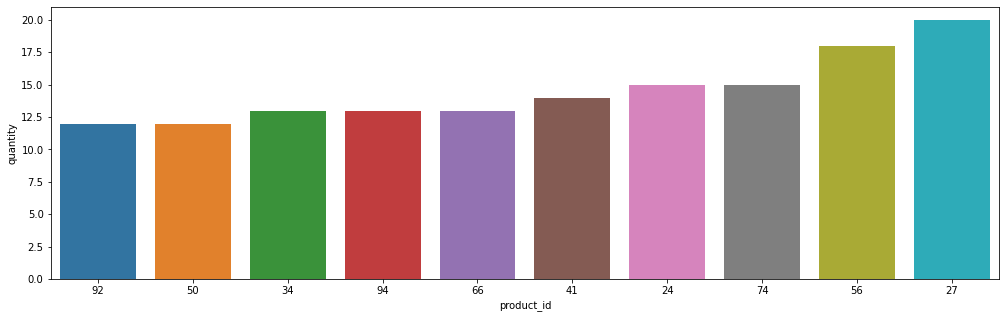

In [130]:
fig, ax = plt.subplots(figsize=(17,5))
sns.barplot(data=products_sold.head(10), x='product_id', y='quantity',
           order=products_sold.sort_values('quantity').product_id, ax=ax)


# теперь наша задача в том, что бы визуализировать сколько было продано товаров по нашим product_id
# первым делом создадим параметры отображения фигуры задав fig - фигура, 
# ax - переменная plt.subplots(Параметр фигуры(размеры))
# из библиотеки seaborn мы будем использовать barplot в который передадим данные sns.barplot(файл=датафрейм).head(10)
# где x-колонка 'product_id' где y - колонка 'quantity'
# так же для красоты мы отсортируем отображение по колличеству 
# проданных элементов order=переменная.сортировкаПО('колонке quantity').колонке product_id 
# так же пропишем что хотим рисовать график на осях которые хранятся в обЪекте ax прописав ax=ax



In [131]:
products_sold.loc[products_sold.product_id == 56]

# далее узнаем сколько товаров было проданно именно для id56
# обрадимся к датафрейму products_sold.loc
# далее обозгачим что [products_sold и product_id ровняется 56]

,product_id,quantity
42,56,18


In [132]:

#                                             Посмотрим на продажи по дням!
#                         Для визуализации снова используйте барплот, только теперь по оси x будут дни,
#                         по которым у нас есть данные (date). Далее выберите верные утверждения:


In [142]:
products_per_day = data.groupby('date', as_index=False).quantity.sum()

# зададим новую переменную в которой обратимся к нашему датафрейму 'data' 
# и сгруппируем данные по date 

Text(0.5, 1.0, 'Покупки по дням')

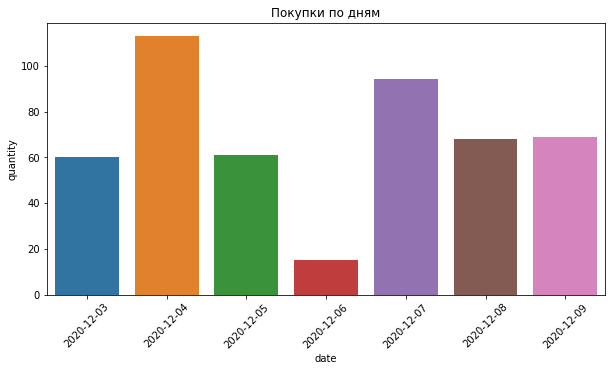

In [143]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=products_per_day, x='date', y='quantity',
           order=products_per_day.date, ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.set_title('Покупки по дням')

# Далее мы выполним те же шаги что и в прошлом задании, только просто заменив x на 'date' 
# y - оставляем тем же самым параметром - quantity
# изменим старый датафрейм на новый - products_per_day


In [145]:
#                          Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?
#                  Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [151]:
duble_2 = data.drop_duplicates(['product_id', 'name', 'date'])

# создаём переменную, указываем датафрейм data. 
# Для удаления повторяющихся строк используется метод drop_duplicates.
# далее передаём колонки, по которым хотим удалить повторяющиеся эллементы

In [152]:
duble_2

# считываем фрейм выше

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
0,18,4,Petr_Fedorov,2020-12-07
1,94,4,Petr_Fedorov,2020-12-07
0,95,2,Vasiliy_Ivanov,2020-12-07
1,83,3,Vasiliy_Ivanov,2020-12-07


In [157]:
duble = data.drop_duplicates(subset=['product_id', 'name', 'date'])

# Чтобы смотреть на повторность не по всем столбцам, а только по части, воспользуйтесь параметром subset

In [158]:
duble.head()

# считываем фрейм выше

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
